In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interpolate as interp

/tmp/ipykernel_115027/3909730636.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


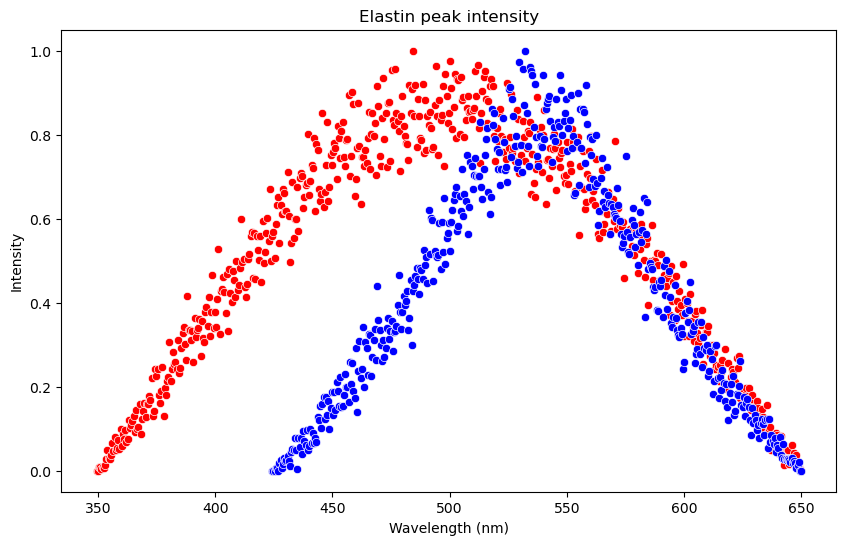

In [2]:
elastin_data = pd.read_csv("elastin_peak_intensity_pairs.csv", header=None)
elastin_data.columns = ["wavelength", "intensity"]
elastin_data

fad_data = pd.read_csv("fad_bound_peak_intensity_pairs.csv", header=None)
fad_data.columns = ["wavelength", "intensity"]

plt.figure(figsize=(10, 6))
# sns.lineplot(x='wavelength', y='intensity', data=elastin_data)
sns.scatterplot(x="wavelength", y="intensity", data=elastin_data, color="red")
sns.scatterplot(x="wavelength", y="intensity", data=fad_data, color="blue")
plt.title("Elastin peak intensity")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.show()

[425 450 500 550 600 650]


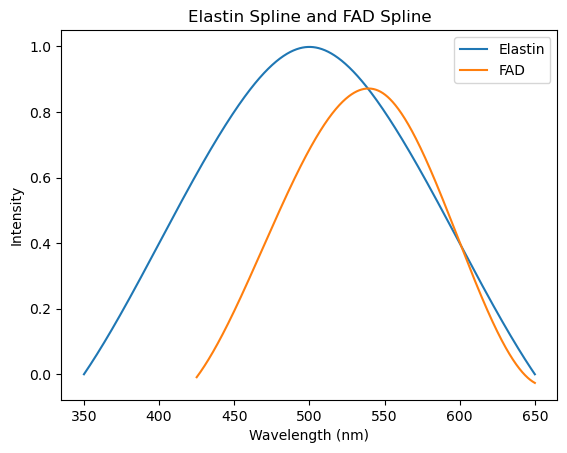

In [3]:
elastin_control_points = np.arange(350, 700, 50)
elastin_intensity_points = [0, 0.4, 0.8, 1.0, 0.8, 0.4, 0]

elastin_spline = interp.UnivariateSpline(
    elastin_control_points, elastin_intensity_points, s=0.000005
)
elastin_x = np.linspace(350, 650, 1000)
elastin_y = elastin_spline(elastin_x)
# elastin_y = elastin_y / sum(elastin_y)

fad_control_points = np.arange(400, 700, 50)
fad_control_points[0] = 425
print(fad_control_points)
fad_intensity_points = [0, 0.2, 0.6, 1.0, 0.3, 0]

# print(len(fad_intensity_points))
# fad_intensity_points = [0, 0.1, 0.4, 0.5, 0.8, 1.0, 0.8, 0.5, 0.2, 0]

fad_spline = interp.UnivariateSpline(fad_control_points, fad_intensity_points, s=0.04)
fad_x = np.linspace(425, 650, 1000)
fad_y = fad_spline(fad_x)
# fad_y = fad_y / sum(fad_y)

plt.figure()
plt.plot(elastin_x, elastin_y, label="Elastin")
plt.plot(fad_x, fad_y, label="FAD")
# sns.scatterplot(x='wavelength', y='intensity', data=elastin_data, color='red')
# sns.scatterplot(x='wavelength', y='intensity', data=fad_data, color='blue')
plt.title("Elastin Spline and FAD Spline")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.show()

In [4]:
np.savez("elastin_spline.npz", x=elastin_x, y=elastin_y, s=0.000005)
np.savez("fad_spline.npz", x=fad_x, y=fad_y, s=0.04)

[350. 400. 450. 480. 530. 590. 650.]
[425.  462.5 500.  537.5 575.  612.5 650. ]


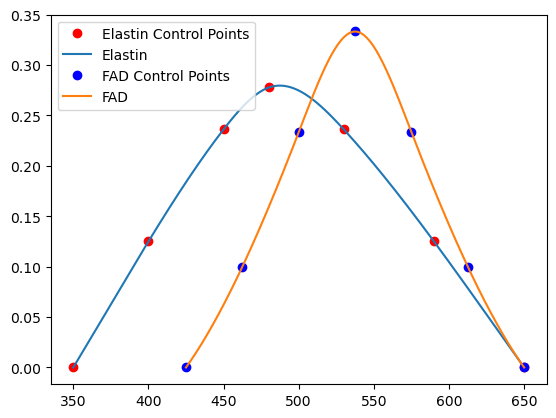

In [18]:
# making a new elastin
elastin_xs = np.linspace(350, 650, 7)
# elastin_xs.put(5, 490)
elastin_xs = np.sort(elastin_xs)
elastin_xs[3] = 480
elastin_xs[4] = 530
elastin_xs[5] = 590
print(elastin_xs)

elastin_ys = [0, 0.45, 0.85, 1.0, 0.85, 0.45, 0]
elastin_ys = np.array(elastin_ys)
elastin_ys *= 0.09
elastin_ys = elastin_ys / np.sum(elastin_ys)

elastin_spline = interp.UnivariateSpline(x=elastin_xs, y=elastin_ys, s=0.00000001)
elastin_x = np.linspace(350, 650, 1000)


# new fad
new_fad_xs = np.linspace(425, 650, 7)
print(new_fad_xs)
new_fad_ys = [0, 0.3, 0.7, 1.0, 0.7, 0.3, 0]
new_fad_ys = np.array(new_fad_ys)
new_fad_ys *= 0.07
new_fad_ys = new_fad_ys / np.sum(new_fad_ys)

new_fad_spline = interp.UnivariateSpline(x=new_fad_xs, y=new_fad_ys, s=0.00000001)
new_fad_x = np.linspace(425, 650, 1000)


plt.figure()
plt.plot(elastin_xs, elastin_ys, "ro", label="Elastin Control Points")
plt.plot(elastin_x, elastin_spline(elastin_x), label="Elastin")
# plt.plot(fad_x, fad_y, label="FAD")
# plt.plot(flavin_x, flavin_y, label="Flavin")
plt.plot(new_fad_xs, new_fad_ys, "bo", label="FAD Control Points")
plt.plot(new_fad_x, new_fad_spline(new_fad_x), label="FAD")
plt.legend()
plt.show()

In [20]:
np.savez("left_shifted_elastin_spline.npz", x=elastin_xs, y=elastin_ys, s=0.00000001)
np.savez("fad_spline.npz", x=new_fad_xs, y=new_fad_ys, s=0.00000001)